# **Proyek Analisi Data: E-commerce Public Dataset** 
- Nama: Faraday Barr Fatahillah
- Email: faradaybarrf@gmail.com
- ID Dicoding: faradaybf

#### Menentukan Pertanyaan Bisnis
- Apakah lokasi dari penjual dan pembeli dapat mempengaruhi kecepatan pegiriman
- Apakah kecepatan pengiriman dapat meningkatkan kepuasan pembeli

#### Import Semua Packages/Library yang digunakan

In [1]:
# Kode dibawah ini untuk menjalankan requirements.txt
# File requiremnets.txt berisi library yang perlu di download.
# Library tersebut yaitu pandas, seaborn, numpy, dan matplotlib
 
# %pip install -r requirements.txt (bisa dijalankan but for a cost and that is my laptop (vscode died 4x now almost bluescreen twice))

In [2]:
# Pertama melakukan beberapa import library yang diperlukan untuk analisis data ini
# Berikut merupakan beberapa library yang diperlukan:

import numpy as np                  # Untuk memproses data dengan memotong(slicing), reshape, dan operasi matematika bila dibutuhkan
import pandas as pd                 # Untuk mengolah/membaca dataset
import seaborn as sns               # Untuk menggambarkan graf data
import matplotlib.pyplot as plt     # Untuk menampilkan graf yang telah dibuat serta label-label yang diperlukan

### **Data Wrangling**

#### Gathering Data

Sesuai dengan pertanyaan yang telah ditetapkan diatas, kita harus melihat terlebih dahulu dataset yang kita miliki. Setelah membaca dataset kita bisa menggunakan dataset `orders`, `order_item`, `seller`, `customer`, `order_reviews`, dan `geolocation`

Berikut merupakan alasan-alasan dari penggunaan dataset tersebut:
1. `customer` = untuk mendapatkan korelasi dengan `seller` agar mendapatkan jarak pengiriman barang (`distance_km`) dan waktu pengiriman barang (`delivery_time`)
2. `seller` = sama seperti `customer`
3. `orders` = mendapatkan data waktu pengiriman barang (`delivery_time`) serta mengkoneksikan `customer` dengan `order_item`
4. `order_item` = mengkoneksikan `orders` dengan `seller`
5. `order_reviews` = mendapatkan `review_score` dengan `order`
6. `geolocation` = mendapatkan koordinat (`{x}_lat` dan `{x}_lng`) dari `seller` dan `customer`

In [3]:
items_df = pd.read_csv('./data/olist_order_items_dataset.csv')
orders_df = pd.read_csv('./data/olist_orders_dataset.csv')
customer_df = pd.read_csv('./data/olist_customers_dataset.csv')
seller_df = pd.read_csv('./data/olist_sellers_dataset.csv')
review_df = pd.read_csv('./data/olist_order_reviews_dataset.csv')
geo_df = pd.read_csv('./data/olist_geolocation_dataset.csv')

Setelah itu kita akan melihat data-data yang ada. Kita gunakan fungsi `head()` milik pandas untuk melihat 5 data pertama dari setiap dataset/dataframe

In [4]:
items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [5]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [6]:
customer_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [7]:
seller_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [8]:
review_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [47]:
geo_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
5,1012,-23.547762,-46.635361,são paulo,SP


#### Assessing Data

Sebelum menggunakan dataset, kita perlu cek apakah terdapat data-data yang kosong (`missing value`), data-data terduplikasi, dan data-data yang tidak berkaitan/tidak diperlukan untuk menjawab pertanyaan kita.
<br>
<br>

**1. Mengetahui `missing value` / `NaN`** <br>
untuk mengetahui `NaN` kita dapat menggunakan fungsi pandas `info()` untuk mengetahui apabila data tersebut kurang atau lebih

**2. Mengetahui data duplikat**<br>
untuk mengetahui data duplikat kita dapat menggunakan fungsi pandas `duplicated()` dan kita tambahkan `sum()` untuk menjumlahkan semua data yang terduplikasi.

**3. Penghapusan data irrelevan**<br>
penghapusan data irrelevan biasanya situasional tergantung dengan kebutuhan dari pertanyaan

**4. Cek nilai statistik data**<br>
mengetahui nilai statistik data kita dapat menggunakan fungsi pandas `describe()` yang dapat digunakan untuk cek keanehan nilai jiga terdapat `missing value`

In [9]:
# Kita akan cek terlebih dahulu apakah ada data yang hilang
# Gunakan .info() untuk cek
# Bisa dilihat hasil data yang ada di bawah ini sama semua, maka dari itu tidak ada data yang hilang

items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [10]:
# Selanjutnya kita cek data terduplikat
# Gunakan .duplicated().sum() untuk mengetahui jumlah duplikasi
# Bisa dilihat hasil data di bawah ini tidak memiliki data duplikat

print("Jumlah duplikat: ", items_df.duplicated().sum())
items_df.describe()

Jumlah duplikat:  0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [11]:
# lakukan hal yang sama dengan lain
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


Kita dapat melihat bahwa data yang kurang tidak sesuai dengan `order_id` sebanyak 99441 sedangkan ada data yang hanya terdapat sebanyak 96476. Kita bisa simpulkan terdapat data yang hilang.<br><br>
Untuk cek banyak data yang hilang kita bisa gunakan `isna()` dan kita jumlahkan dengan `sum()`.

In [12]:
# kita lihat sebanyak hampir 3000 data hilang. Kita catat terlebih dahulu dan lanjutkan ke prosedur berikutnya

orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [13]:
print("Jumlah duplikat: ", orders_df.duplicated().sum())
orders_df.describe()

Jumlah duplikat:  0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [14]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [15]:
print("Jumlah duplikasi: ",  customer_df.duplicated().sum())
customer_df.describe()

Jumlah duplikasi:  0


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [16]:
seller_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [17]:
print("Jumlah duplikasi: ",  seller_df.duplicated().sum())
seller_df.describe()

Jumlah duplikasi:  0


,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


In [18]:
# Bisa dilihat data seperti review_comment_title sangat sedikit namun kita tidak perlu 
# menggunakannya yang perlu kita ambil hanya skor saja jadi bisa kita abaikan.

review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [19]:
print("Jumlah duplikasi: ",  review_df.duplicated().sum())
review_df.describe()

Jumlah duplikasi:  0


,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [20]:
geo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [21]:
print("Jumlah duplikasi: ",  geo_df.duplicated().sum())
geo_df.describe()

Jumlah duplikasi:  261831


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


Berikut merupakan hasil dari analisis penilaian data:

- items aman
- orders ada yang ilang jadi gak dipake (drop) / yang approved bisa kita isi dengan purchase timestamp alias di approve langsung setelah dibeli
- customer aman
- seller aman
- review liat yang skor saja yang lain tidak dipakai
- geolocation banyak duplikasi harus dihapus dan mengambil data pertama sebelum duplikasi

#### Cleaning Data

Beberapa cara kita dapat membersihkan data adalah dengan menghapus data `drop()` atau mengisi `NaN` dengan `fillna()`. Pada proyek kali ini akan lebih sering digunakan `drop()` karena data yang hilang merupakan data waktu sehingga kita tidak dapat mengisi secara asal. Jika kita isi secara asal, maka data akan tidak valid.
<br>
<br>

Sesuai dengan konklusi di atas, yang perlu kita bersihkan adalah `orders`, `orders_review`, dan `geolocation`.

In [22]:
# Orders memiliki permasalahan bahwa data-data hilang sehingga kita dapat cek menggunakan fungsi pandas isna() untuk cek data hilang

orders_df[orders_df.order_delivered_customer_date.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaN,2018-06-28 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaN,2018-08-21 00:00:00
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaN,2017-10-03 00:00:00
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaN,2018-02-07 00:00:00
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaN,NaN,2018-02-06 00:00:00
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaN,NaN,NaN,2018-09-27 00:00:00
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaN,NaN,2017-09-15 00:00:00


In [23]:
# kita gunakan fungsi dropna() untuk menghapus data-data order_delivered_customer_date yang NaN dan cek lagi data-data yang kosong

orders_df = orders_df.dropna(subset=['order_delivered_customer_date'])
orders_df.isna().sum()

order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_approved_at                14
order_delivered_carrier_date      1
order_delivered_customer_date     0
order_estimated_delivery_date     0
dtype: int64

In [24]:
# Kemudian sisa-sisa data yang hilang adalah order_approved_at

orders_df[orders_df.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
5323,e04abd8149ef81b95221e88f6ed9ab6a,2127dc6603ac33544953ef05ec155771,delivered,2017-02-18 14:40:00,NaN,2017-02-23 12:04:47,2017-03-01 13:25:33,2017-03-17 00:00:00
16567,8a9adc69528e1001fc68dd0aaebbb54a,4c1ccc74e00993733742a3c786dc3c1f,delivered,2017-02-18 12:45:31,NaN,2017-02-23 09:01:52,2017-03-02 10:05:06,2017-03-21 00:00:00
19031,7013bcfc1c97fe719a7b5e05e61c12db,2941af76d38100e0f8740a374f1a5dc3,delivered,2017-02-18 13:29:47,NaN,2017-02-22 16:25:25,2017-03-01 08:07:38,2017-03-17 00:00:00
22663,5cf925b116421afa85ee25e99b4c34fb,29c35fc91fc13fb5073c8f30505d860d,delivered,2017-02-18 16:48:35,NaN,2017-02-22 11:23:10,2017-03-09 07:28:47,2017-03-31 00:00:00
23156,12a95a3c06dbaec84bcfb0e2da5d228a,1e101e0daffaddce8159d25a8e53f2b2,delivered,2017-02-17 13:05:55,NaN,2017-02-22 11:23:11,2017-03-02 11:09:19,2017-03-20 00:00:00
26800,c1d4211b3dae76144deccd6c74144a88,684cb238dc5b5d6366244e0e0776b450,delivered,2017-01-19 12:48:08,NaN,2017-01-25 14:56:50,2017-01-30 18:16:01,2017-03-01 00:00:00
38290,d69e5d356402adc8cf17e08b5033acfb,68d081753ad4fe22fc4d410a9eb1ca01,delivered,2017-02-19 01:28:47,NaN,2017-02-23 03:11:48,2017-03-02 03:41:58,2017-03-27 00:00:00
39334,d77031d6a3c8a52f019764e68f211c69,0bf35cac6cc7327065da879e2d90fae8,delivered,2017-02-18 11:04:19,NaN,2017-02-23 07:23:36,2017-03-02 16:15:23,2017-03-22 00:00:00
48401,7002a78c79c519ac54022d4f8a65e6e8,d5de688c321096d15508faae67a27051,delivered,2017-01-19 22:26:59,NaN,2017-01-27 11:08:05,2017-02-06 14:22:19,2017-03-16 00:00:00
61743,2eecb0d85f281280f79fa00f9cec1a95,a3d3c38e58b9d2dfb9207cab690b6310,delivered,2017-02-17 17:21:55,NaN,2017-02-22 11:42:51,2017-03-03 12:16:03,2017-03-20 00:00:00


In [25]:
# Pada bagian ini saya buat pembelian barang di approve sesuai dengan waktu dibeli untuk tidak menghapus terlalu banyak data

orders_df['order_approved_at'] = orders_df['order_approved_at'].fillna(orders_df['order_purchase_timestamp'])

In [26]:
# Setelah itu, kita cek lagi data yang hilang

orders_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     1
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [27]:
orders_df[orders_df.order_delivered_carrier_date.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
73222,2aa91108853cecb43c84a5dc5b277475,afeb16c7f46396c0ed54acb45ccaaa40,delivered,2017-09-29 08:52:58,2017-09-29 09:07:16,NaN,2017-11-20 19:44:47,2017-11-14 00:00:00


In [28]:
# Karena data yang hilang hanya satu maka saya drop saja

orders_df = orders_df.dropna(subset=['order_delivered_carrier_date'])
orders_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [29]:
# Selanjutnya kita hapus duplikasi dari geolokasi dan menambahkan parameter keep='first' untuk menyimpan data kode pos yang pertama kali sebelum duplikasi
geo_df = geo_df.drop_duplicates(subset='geolocation_zip_code_prefix', keep='first')

print("Jumlah duplikasi: ",  geo_df.duplicated().sum())
geo_df.describe()

Jumlah duplikasi:  0


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,19015.000000,19015.000000,19015.000000
mean,42711.591901,-19.062087,-46.058008
std,30905.051745,7.319402,5.380751
min,1001.000000,-36.605374,-72.927296
25%,12721.500000,-23.564386,-49.000445
50%,38240.000000,-22.429252,-46.632544
75%,70656.500000,-15.615448,-43.255324
max,99990.000000,42.184003,121.105394


In [30]:
# Selain itu, data yang saya hapus juga ada data yang order_status = canceled karena kita tidak perlu menggunakan data tersebut

orders_df = orders_df[orders_df['order_status'] != 'canceled']

### **Exploratory Data Analysis (EDA)**

Bagian ini adalah bagian kita *prepare* semua data yang kita punya untuk divisualisasikan nanti. Hal pertama yang dilakukan adalah kita perlu menggabungkan semua data yang kita punya menggunakan fungsi `merge()`. Setelah itu kita akan mencari jarak antara `seller` dengan `customer` menggunakan library `haversine`. 
<br>
<br>
(Bagian ini yang memakan waktu sedikit (gak sedikit) lama karena saya sempat bingung cara mendapatkan `delivery_time` dan `distance_km` serta saya harus baru tau library `haversine`)

#### Explore

In [32]:
# Sesuai dengan yang telah dijelaskan di atas, kita perlu menyatukan terlebih dahulu data-data yang ada menggunakan merge()
# Kita satukan sesuai dengan id mereka seperti order_items dan orders menggunakan order_id, dst.

all_df = pd.merge(items_df,orders_df, on='order_id')
all_df = pd.merge(all_df, customer_df, on='customer_id')
all_df = pd.merge(all_df, seller_df, on='seller_id')
all_df = pd.merge(all_df, review_df, on='order_id')

all_df.sample(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,customer_state,seller_zip_code_prefix,seller_city,seller_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
19439,9ac146c59c6dae84516a85362fdbbebf,1,65fd9b358b7ee029fba34839e9c35fdf,9f505651f4a6abe901a56cdc21508025,2018-07-31 10:15:13,29.99,8.37,f6a59386e50dcff8b77c3f1e99c218a7,delivered,2018-07-28 09:59:43,...,SP,4102,sao paulo,SP,2fa1c1c8cef8e0a265667f2f05c10b83,5,NaN,NaN,2018-08-01 00:00:00,2018-08-02 14:01:07
19966,4289c523d9d7daf854afd779579d63dc,1,995e25d9b46dee183004994645768d95,955fee9216a65b617aa5c0531780ce60,2018-07-26 15:55:18,39.00,18.37,8511391dc75fca4d08cd7ae54a049606,delivered,2018-07-24 15:43:18,...,PR,4782,sao paulo,SP,54079bac91412b15c2b65bfa3a545f31,5,NaN,NaN,2018-07-31 00:00:00,2018-08-02 15:54:19
107153,cadf75f0c2e29639d54ff0430d98e9f7,1,0210b75f6f4de09dfc17a66803290f8a,141440cad9341e553f8401c574a2aa38,2018-08-06 22:10:12,142.00,27.94,25e4078d42ba4b106674df3702bc066e,delivered,2018-08-04 21:57:34,...,MG,85200,pitanga,PR,0010388b006db42c9457d7148035db0e,4,NaN,NaN,2018-08-12 00:00:00,2018-08-14 11:35:39
60612,0b5a860df8a893e7020960b28cd67196,2,dc405c97a6bb6f7d86222f2160540b02,dbd66278cbfe1aa1000f90a217ca4695,2018-08-27 00:24:30,53.30,12.67,c08966d4afbdb8bea76adb8fbf221ceb,delivered,2018-08-23 00:09:30,...,SP,5588,sao paulo,SP,35085627170908dfa13c5bbcc3c150c3,5,NaN,NaN,2018-08-25 00:00:00,2018-08-28 16:01:48
86329,d631ff71a4160145d9473055d6cf74fb,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-05 10:47:05,252.00,46.22,40e1601f4dd60faaea6b38c69223e617,delivered,2017-12-30 10:31:39,...,SP,88303,itajai,SC,969825e5cae762166a809e6d8f73cd5a,5,NaN,NaN,2018-01-12 00:00:00,2018-01-12 22:16:26


In [33]:
# Setelah itu kita cek semua kolom yang ada (jika menggunakan vscode klik scrollable element untuk melihat semuanya)

all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110004 entries, 0 to 110003
Data columns (total 27 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       110004 non-null  object 
 1   order_item_id                  110004 non-null  int64  
 2   product_id                     110004 non-null  object 
 3   seller_id                      110004 non-null  object 
 4   shipping_limit_date            110004 non-null  object 
 5   price                          110004 non-null  float64
 6   freight_value                  110004 non-null  float64
 7   customer_id                    110004 non-null  object 
 8   order_status                   110004 non-null  object 
 9   order_purchase_timestamp       110004 non-null  object 
 10  order_approved_at              110004 non-null  object 
 11  order_delivered_carrier_date   110004 non-null  object 
 12  order_delivered_customer_date 

Menyesuaikan dengan pertanyaan di atas, data-data yang di perlukan:
- order_id
- seller_id
- customer_id
- order_status
- order_purchase_timestamp
- order_delivered_customer_date
- customer_zip_code_prefix
- customer_city
- customer_state
- seller_zip_code_prefix
- seller_city
- seller_state
- review_id
- review_score

Data yang paling krusial digunakan adalah `order_status`, `order_purchase_timestamp`, `customer_zip_code_prefix`, `seller_zip_code_prefix`, dan `review_score`. Masing-masing kolom ini memiliki fungsi tertentu.

In [34]:
# Kita deklarasikan list of columns yang diperlukan dan kita deklarasikan all_df yang baru dengan columns tersebut

columns_keep= [
    'order_id', 'seller_id', 'customer_id', 'order_status',
    'order_purchase_timestamp', 'order_delivered_customer_date',
    'customer_zip_code_prefix', 'customer_city', 'customer_state',
    'seller_zip_code_prefix', 'seller_city', 'seller_state',
    'review_id', 'review_score'
]

all_df = all_df[columns_keep]
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110004 entries, 0 to 110003
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   order_id                       110004 non-null  object
 1   seller_id                      110004 non-null  object
 2   customer_id                    110004 non-null  object
 3   order_status                   110004 non-null  object
 4   order_purchase_timestamp       110004 non-null  object
 5   order_delivered_customer_date  110004 non-null  object
 6   customer_zip_code_prefix       110004 non-null  int64 
 7   customer_city                  110004 non-null  object
 8   customer_state                 110004 non-null  object
 9   seller_zip_code_prefix         110004 non-null  int64 
 10  seller_city                    110004 non-null  object
 11  seller_state                   110004 non-null  object
 12  review_id                      110004 non-nu

In [35]:
# Kita cek 5 data pertama

all_df.head()

,order_id,seller_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,review_id,review_score
0,00010242fe8c5a6d1ba2dd792cb16214,48436dade18ac8b2bce089ec2a041202,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48,28013,campos dos goytacazes,RJ,27277,volta redonda,SP,97ca439bc427b48bc1cd7177abe71365,5
1,0188777fe321843a18be24a6e9aa1e53,48436dade18ac8b2bce089ec2a041202,dc573d2a61a467e5e2826c1729691859,delivered,2017-07-23 16:13:37,2017-07-28 16:18:00,25240,duque de caxias,RJ,27277,volta redonda,SP,1fac9acb29e014e3b9b393d5c8505f99,5
2,0191bbb5166d4b9a68df11797d5acfa9,48436dade18ac8b2bce089ec2a041202,62b59a64eb786a96516229b7f3612c72,delivered,2017-08-10 12:17:35,2017-08-24 18:15:16,93010,sao leopoldo,RS,27277,volta redonda,SP,2eab04a8f45efa131d44cf58b37ab595,5
3,03054d8a8eefc2981cfad06f58e27979,48436dade18ac8b2bce089ec2a041202,9bd2f246e81c19f65c539ce426288ef5,delivered,2017-10-02 10:25:22,2017-10-19 21:03:49,3560,sao paulo,SP,27277,volta redonda,SP,9d0e152a1983460f059ddffcb8af03bb,5
4,0c325ea6925de749e1420be0cf43587c,48436dade18ac8b2bce089ec2a041202,e03505278b34146e87c0b4eb41e4f082,delivered,2017-07-01 15:27:23,2017-07-10 17:17:21,18540,porto feliz,SP,27277,volta redonda,SP,f4fad24d4bb3462bab004be9a0b753f0,4


Setelah ini, kita akan mendapatkan lokasi dari `customer` dan `seller` dari `zip_code_prefix` mereka masing-masing yang mendapatkan datanya dari `geo_df`. Hal yang dilakukan adalah dengan merge terlebih dahulu, rename lokasi menjadi `customer` atau `seller`, kemudian baru kita hitung. Kita harus melaksanakan ini satu persatu atau saat pelaksaan rename terdapat `_x` atau `_y`seperti pada `geolocation_zip_code_prefix` maka dari itu saya drop.

In [36]:
all_df = pd.merge(all_df, geo_df, how='left', left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix')
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110004 entries, 0 to 110003
Data columns (total 19 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       110004 non-null  object 
 1   seller_id                      110004 non-null  object 
 2   customer_id                    110004 non-null  object 
 3   order_status                   110004 non-null  object 
 4   order_purchase_timestamp       110004 non-null  object 
 5   order_delivered_customer_date  110004 non-null  object 
 6   customer_zip_code_prefix       110004 non-null  int64  
 7   customer_city                  110004 non-null  object 
 8   customer_state                 110004 non-null  object 
 9   seller_zip_code_prefix         110004 non-null  int64  
 10  seller_city                    110004 non-null  object 
 11  seller_state                   110004 non-null  object 
 12  review_id                     

In [37]:
all_df = all_df.rename(columns={"geolocation_lat":"customer_lat", "geolocation_lng":"customer_lng"})
all_df = all_df.drop(columns=['geolocation_city', 'geolocation_state'])
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110004 entries, 0 to 110003
Data columns (total 17 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       110004 non-null  object 
 1   seller_id                      110004 non-null  object 
 2   customer_id                    110004 non-null  object 
 3   order_status                   110004 non-null  object 
 4   order_purchase_timestamp       110004 non-null  object 
 5   order_delivered_customer_date  110004 non-null  object 
 6   customer_zip_code_prefix       110004 non-null  int64  
 7   customer_city                  110004 non-null  object 
 8   customer_state                 110004 non-null  object 
 9   seller_zip_code_prefix         110004 non-null  int64  
 10  seller_city                    110004 non-null  object 
 11  seller_state                   110004 non-null  object 
 12  review_id                     

In [38]:
all_df = pd.merge(all_df, geo_df, how='left', left_on='seller_zip_code_prefix', right_on='geolocation_zip_code_prefix')
all_df = all_df.rename(columns={"geolocation_lat":"seller_lat", "geolocation_lng":"seller_lng"})
all_df = all_df.drop(columns=['geolocation_city', 'geolocation_state', 'geolocation_zip_code_prefix_x','geolocation_zip_code_prefix_y'])
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110004 entries, 0 to 110003
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       110004 non-null  object 
 1   seller_id                      110004 non-null  object 
 2   customer_id                    110004 non-null  object 
 3   order_status                   110004 non-null  object 
 4   order_purchase_timestamp       110004 non-null  object 
 5   order_delivered_customer_date  110004 non-null  object 
 6   customer_zip_code_prefix       110004 non-null  int64  
 7   customer_city                  110004 non-null  object 
 8   customer_state                 110004 non-null  object 
 9   seller_zip_code_prefix         110004 non-null  int64  
 10  seller_city                    110004 non-null  object 
 11  seller_state                   110004 non-null  object 
 12  review_id                     

Untuk perhitungan menggunakan `haversine`, kita perlu memanggil library terlebih dahulu. Kemudian kita gunakan fungsi pandas yaitu `apply()` untuk mengaplikasikan perintah untuk semua indeks. Perintah tersebut kita buat sebuah fungsi kosong (`lambda`) yang berisi sebagai berikut:

`haversine((customer_lat, customer_lng), (seller_lat, seller_lng))`

In [39]:
from haversine import haversine

all_df['distance_km'] = all_df.apply(lambda row: haversine((row['customer_lat'], row['customer_lng']),(row['seller_lat'],row['seller_lng'])),axis=1)
all_df.head()

,order_id,seller_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,review_id,review_score,customer_lat,customer_lng,seller_lat,seller_lng,distance_km
0,00010242fe8c5a6d1ba2dd792cb16214,48436dade18ac8b2bce089ec2a041202,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48,28013,campos dos goytacazes,RJ,27277,volta redonda,SP,97ca439bc427b48bc1cd7177abe71365,5,-21.758076,-41.312633,-22.498183,-44.123614,301.006080
1,0188777fe321843a18be24a6e9aa1e53,48436dade18ac8b2bce089ec2a041202,dc573d2a61a467e5e2826c1729691859,delivered,2017-07-23 16:13:37,2017-07-28 16:18:00,25240,duque de caxias,RJ,27277,volta redonda,SP,1fac9acb29e014e3b9b393d5c8505f99,5,-22.651763,-43.299104,-22.498183,-44.123614,86.361728
2,0191bbb5166d4b9a68df11797d5acfa9,48436dade18ac8b2bce089ec2a041202,62b59a64eb786a96516229b7f3612c72,delivered,2017-08-10 12:17:35,2017-08-24 18:15:16,93010,sao leopoldo,RS,27277,volta redonda,SP,2eab04a8f45efa131d44cf58b37ab595,5,-29.764677,-51.152386,-22.498183,-44.123614,1069.558848
3,03054d8a8eefc2981cfad06f58e27979,48436dade18ac8b2bce089ec2a041202,9bd2f246e81c19f65c539ce426288ef5,delivered,2017-10-02 10:25:22,2017-10-19 21:03:49,3560,sao paulo,SP,27277,volta redonda,SP,9d0e152a1983460f059ddffcb8af03bb,5,-23.551047,-46.494672,-22.498183,-44.123614,269.406395
4,0c325ea6925de749e1420be0cf43587c,48436dade18ac8b2bce089ec2a041202,e03505278b34146e87c0b4eb41e4f082,delivered,2017-07-01 15:27:23,2017-07-10 17:17:21,18540,porto feliz,SP,27277,volta redonda,SP,f4fad24d4bb3462bab004be9a0b753f0,4,-23.213643,-47.522045,-22.498183,-44.123614,357.180078


Setelah itu kita mencari data `delivery_time` dari `order_delivered_customer_date` dikurangi `order_purchase_timestamp` dengan mengubah data text menjadi waktu, dikurangi, dan diubah menjadi dalam bentuk hari.

In [40]:
all_df['order_purchase_timestamp'] = pd.to_datetime(all_df['order_purchase_timestamp'])
all_df['order_delivered_customer_date'] = pd.to_datetime(all_df['order_delivered_customer_date'])
all_df['delivery_time'] = (all_df['order_delivered_customer_date'] - all_df['order_purchase_timestamp']).dt.days

all_df.head()

,order_id,seller_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,review_id,review_score,customer_lat,customer_lng,seller_lat,seller_lng,distance_km,delivery_time
0,00010242fe8c5a6d1ba2dd792cb16214,48436dade18ac8b2bce089ec2a041202,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48,28013,campos dos goytacazes,RJ,27277,volta redonda,SP,97ca439bc427b48bc1cd7177abe71365,5,-21.758076,-41.312633,-22.498183,-44.123614,301.006080,7
1,0188777fe321843a18be24a6e9aa1e53,48436dade18ac8b2bce089ec2a041202,dc573d2a61a467e5e2826c1729691859,delivered,2017-07-23 16:13:37,2017-07-28 16:18:00,25240,duque de caxias,RJ,27277,volta redonda,SP,1fac9acb29e014e3b9b393d5c8505f99,5,-22.651763,-43.299104,-22.498183,-44.123614,86.361728,5
2,0191bbb5166d4b9a68df11797d5acfa9,48436dade18ac8b2bce089ec2a041202,62b59a64eb786a96516229b7f3612c72,delivered,2017-08-10 12:17:35,2017-08-24 18:15:16,93010,sao leopoldo,RS,27277,volta redonda,SP,2eab04a8f45efa131d44cf58b37ab595,5,-29.764677,-51.152386,-22.498183,-44.123614,1069.558848,14
3,03054d8a8eefc2981cfad06f58e27979,48436dade18ac8b2bce089ec2a041202,9bd2f246e81c19f65c539ce426288ef5,delivered,2017-10-02 10:25:22,2017-10-19 21:03:49,3560,sao paulo,SP,27277,volta redonda,SP,9d0e152a1983460f059ddffcb8af03bb,5,-23.551047,-46.494672,-22.498183,-44.123614,269.406395,17
4,0c325ea6925de749e1420be0cf43587c,48436dade18ac8b2bce089ec2a041202,e03505278b34146e87c0b4eb41e4f082,delivered,2017-07-01 15:27:23,2017-07-10 17:17:21,18540,porto feliz,SP,27277,volta redonda,SP,f4fad24d4bb3462bab004be9a0b753f0,4,-23.213643,-47.522045,-22.498183,-44.123614,357.180078,9


### Visualization & Explanatory Analysis

Setelah semua data sudah disiapkan, mari kita visualisasikan data agar dapat memberikan cerita serta menarik kesimpulan sesuai dengan pertanyaan yang telah kita tentukan di atas.
<br>
<br>
Pada pertanyaan pertama karena pertanyaan tersebut merupakan hubungan sebab akibat, maka kita dapat menggunakan scatterplot untuk mencari tahu apakah data tersebut terdapat korelasi antara `delivery_time` dengan `distance_km` `seller` dengan `customer`. Di bawah scatterplot terdapat data frekuensi `seller` terbanyak yang melaksanakan pengiriman. Maka dari itu, plot akan menyesuaikan dengan banyaknya pengiriman dari `seller` tertentu menggunakan `seller_zip_code_prefix`
<br>
<br>
Pada pertanyaan kedua kita gunakan lineplot untuk mengetahui kualitas `delivery_time` dengan `review_score`

#### Pertanyaan 1:

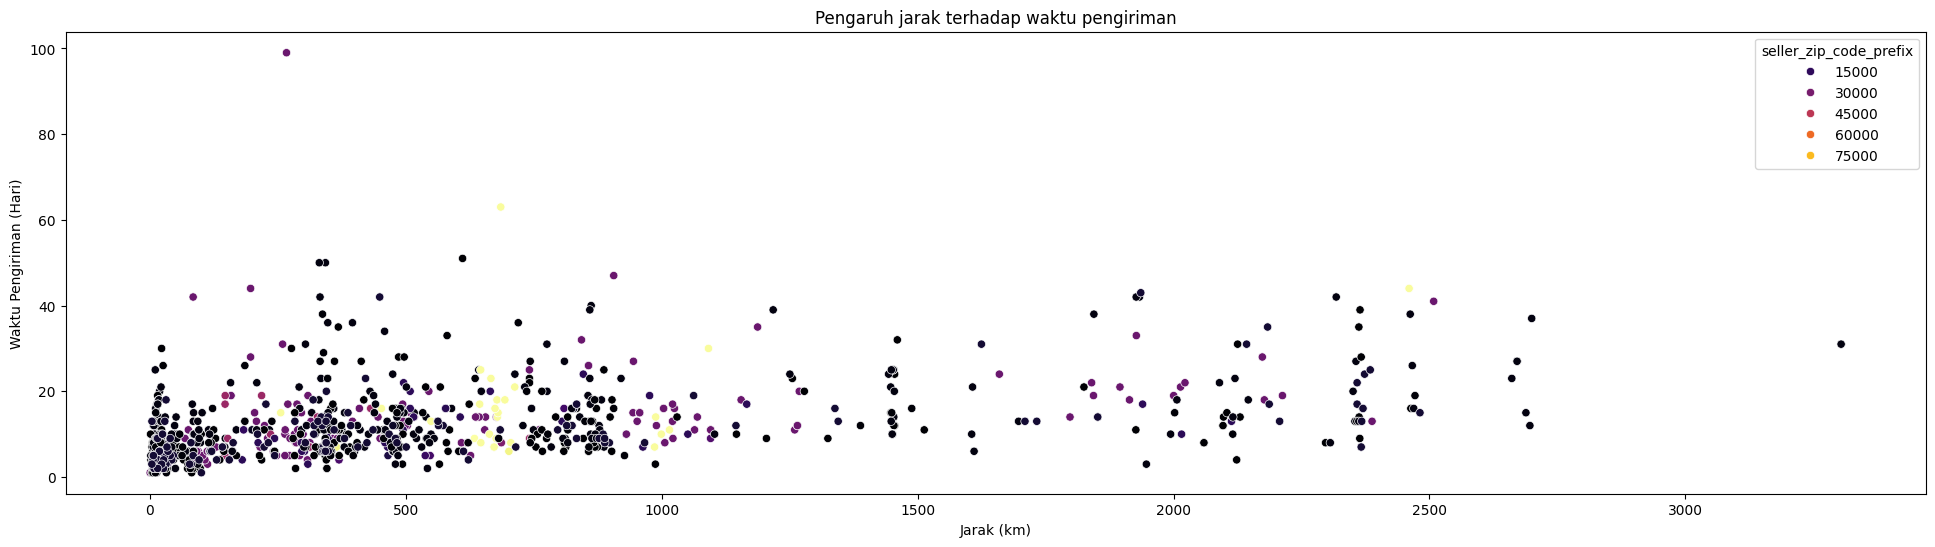

In [41]:
plt.figure(figsize=(24,6))
sns.scatterplot(x='distance_km',y='delivery_time', hue='seller_zip_code_prefix', data=all_df[0:1000], palette='inferno')

plt.title("Pengaruh jarak terhadap waktu pengiriman")
plt.xlabel("Jarak (km)")
plt.ylabel("Waktu Pengiriman (Hari)")
plt.show()


In [42]:
all_df.groupby('seller_zip_code_prefix').count().sort_values(by='order_id',ascending=False)

,order_id,seller_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,customer_zip_code_prefix,customer_city,customer_state,seller_city,seller_state,review_id,review_score,customer_lat,customer_lng,seller_lat,seller_lng,distance_km,delivery_time
seller_zip_code_prefix,,,,,,,,,,,,,,,,,,,
14940,7659,7659,7659,7659,7659,7659,7659,7659,7659,7659,7659,7659,7659,7633,7633,7659,7659,7633,7659
15025,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,1999,1999,2004,2004,1999,2004
5849,1999,1999,1999,1999,1999,1999,1999,1999,1999,1999,1999,1999,1999,1993,1993,1999,1999,1993,1999
9015,1760,1760,1760,1760,1760,1760,1760,1760,1760,1760,1760,1760,1760,1746,1746,1760,1760,1746,1760
13405,1581,1581,1581,1581,1581,1581,1581,1581,1581,1581,1581,1581,1581,1579,1579,1581,1581,1579,1581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15093,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
19010,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
88107,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


#### Pertanyaan 2:

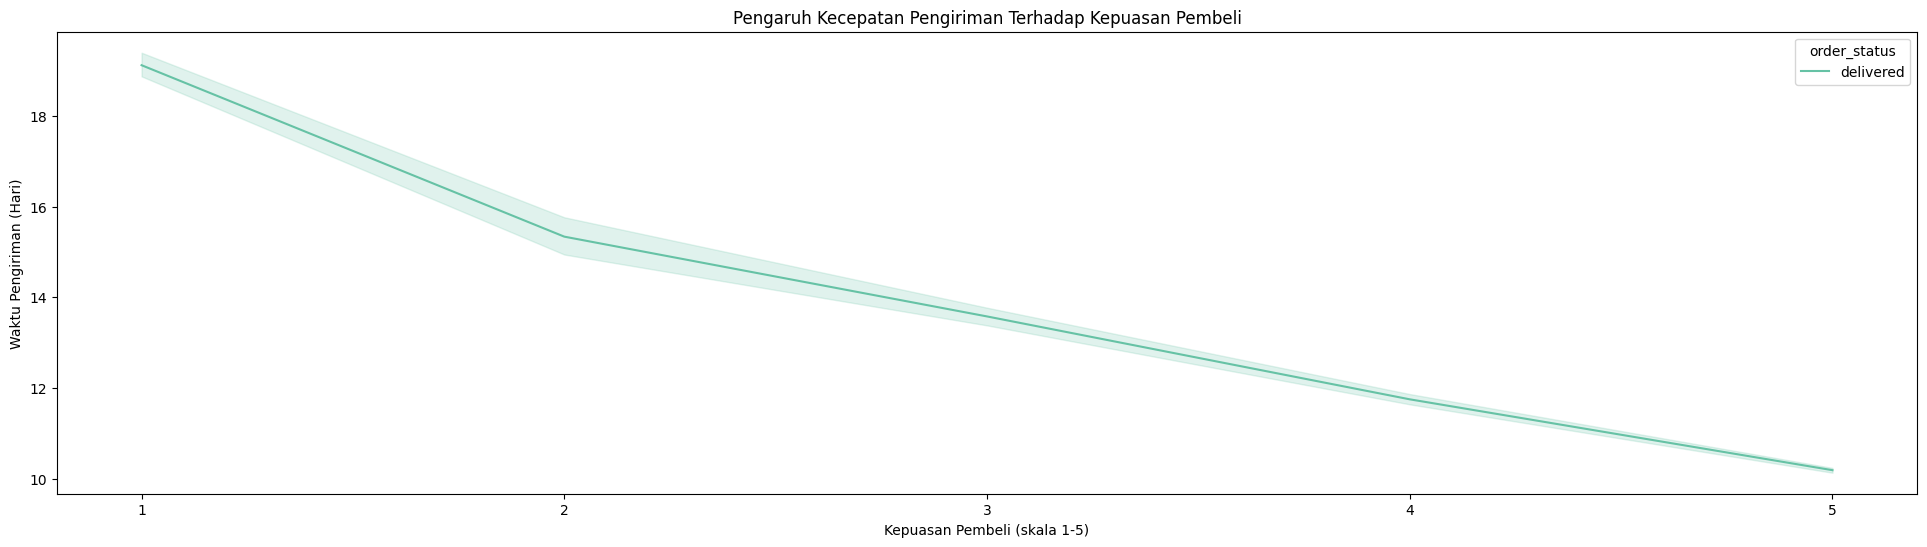

In [45]:
import matplotlib.ticker as mticker

plt.figure(figsize=(24,6))
sns.lineplot(x='review_score', y='delivery_time', hue='order_status', data=all_df, palette='Set2')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))   

plt.title('Pengaruh Kecepatan Pengiriman Terhadap Kepuasan Pembeli')
plt.xlabel('Kepuasan Pembeli (skala 1-5)')
plt.ylabel('Waktu Pengiriman (Hari)')  
plt.show()

### Conclusion

Dari grafik diatas, kita dapat menyimpulkan beberapa hal
1. Semakin jauh jarak antara pembeli dengan penjual, semakin lama waktu pengiriman barang
2. Semakin cepat waktu pengiriman barang, semakin senang juga pembeli